In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/measurements_clean.csv",encoding = "ISO-8859-1")

In [4]:
data

,distance,consume,speed,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,12,E10,0,0,0
1,12.0,4.2,30,13,E10,0,0,0
2,11.2,5.5,38,15,E10,0,0,0
3,12.9,3.9,36,14,E10,0,0,0
4,18.5,4.5,46,15,E10,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,18,SP98,0,0,0
384,16.1,4.3,38,31,SP98,1,0,0
385,16.0,3.8,45,19,SP98,0,0,0
386,15.4,4.6,42,31,SP98,1,0,0


In [5]:
data.corr()

,distance,consume,speed,temp_outside,ac,rain,sun
distance,1.000000,-0.128967,0.562299,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.088175,-0.320811,0.015411,1.000000,0.167562,-0.186315,0.346903
ac,-0.025738,0.096591,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.346903,0.088598,-0.112650,1.000000


In [12]:
data[(data.gas_type == 'E10')].mean()

distance        21.09625
consume          4.93125
speed           43.50625
temp_outside    10.11875
ac               0.04375
rain             0.10000
sun              0.07500
dtype: float64

In [13]:
data[(data.gas_type == 'SP98')].mean()

distance        18.639912
consume          4.899123
speed           40.820175
temp_outside    12.228070
ac               0.100877
rain             0.140351
sun              0.087719
dtype: float64

#### De media tienen un consumo muy similar 

In [14]:
E10 = data[(data.gas_type == 'E10')]
SP98 = data[(data.gas_type == 'SP98')]

In [97]:
E10.corr()

,distance,consume,speed,temp_outside,ac,rain,sun
distance,1.000000,-0.172572,0.633082,0.158903,0.045776,-0.073315,0.027364
consume,-0.172572,1.000000,-0.233318,-0.322918,0.043591,0.248199,-0.160503
speed,0.633082,-0.233318,1.000000,0.091093,0.125102,-0.001633,0.128376
temp_outside,0.158903,-0.322918,0.091093,1.000000,0.048762,-0.097756,0.236743
ac,0.045776,0.043591,0.125102,0.048762,1.000000,0.336123,0.171118
rain,-0.073315,0.248199,-0.001633,-0.097756,0.336123,1.000000,-0.094916
sun,0.027364,-0.160503,0.128376,0.236743,0.171118,-0.094916,1.000000


In [98]:
SP98.corr()

,distance,consume,speed,temp_outside,ac,rain,sun
distance,1.000000,-0.109841,0.521258,0.065534,-0.046792,0.012206,0.112846
consume,-0.109841,1.000000,-0.232245,-0.322177,0.120324,0.250377,-0.176202
speed,0.521258,-0.232245,1.000000,-0.009368,-0.102913,0.026668,0.053796
temp_outside,0.065534,-0.322177,-0.009368,1.000000,0.200230,-0.251129,0.411229
ac,-0.046792,0.120324,-0.102913,0.200230,1.000000,0.200071,0.050578
rain,0.012206,0.250377,0.026668,-0.251129,0.200071,1.000000,-0.125294
sun,0.112846,-0.176202,0.053796,0.411229,0.050578,-0.125294,1.000000


In [94]:
E10.ac.value_counts()

0    153
1      7
Name: ac, dtype: int64

In [151]:
E10[(E10.ac == 0) & (E10.consume > 4) & (E10.consume < 5)].mean()

distance        25.608571
consume          4.535714
speed           46.114286
temp_outside    10.514286
ac               0.000000
rain             0.042857
sun              0.085714
dtype: float64

In [152]:
SP98[(SP98.ac == 0)& (SP98.consume > 4) & (SP98.consume < 5)].mean()

distance        20.804211
consume          4.480000
speed           43.094737
temp_outside    12.694737
ac               0.000000
rain             0.094737
sun              0.063158
dtype: float64

In [155]:
SP98[(SP98.ac == 1)& (SP98.consume > 4) & (SP98.consume < 5)].mean()

distance        16.52
consume          4.41
speed           41.80
temp_outside    17.30
ac               1.00
rain             0.10
sun              0.20
dtype: float64

#### Viendo que cuando usamos el tipo E10 practicamente no se puso el AC hago la comparación sin AC. Podemos observar que con un consumo similar con E10 se pudo arecorrer más distance y a más velocidad. Podriamos suponer que pudo ir en marchas más largas de media rebajando el consumo.

In [188]:
print(E10[(E10.ac == 0) & (E10.speed > 5) & (E10.speed < 30)].shape)
E10[(E10.ac == 0) & (E10.speed > 5) & (E10.speed < 30)].mean()

(26, 8)


distance        11.269231
consume          5.634615
speed           25.038462
temp_outside    10.269231
ac               0.000000
rain             0.115385
sun              0.038462
dtype: float64

In [189]:
print(SP98[(SP98.ac == 0) & (SP98.speed > 5) & (SP98.speed < 30)].shape)
SP98[(SP98.ac == 0) & (SP98.speed > 5) & (SP98.speed < 30)].mean()

(42, 8)


distance        11.564286
consume          5.640476
speed           24.976190
temp_outside    10.714286
ac               0.000000
rain             0.095238
sun              0.095238
dtype: float64

#### Vemos que a una velocidad entre 5 y 30 con una media entorno a 25 el consumo y la distancia recorrida son practicamente las mismas

In [199]:
print(E10[(E10.ac == 0) & (E10.speed > 50) & (E10.speed < 100)].shape)
E10[(E10.ac == 0) & (E10.speed > 50) & (E10.speed < 100)].mean()

(38, 8)


distance        37.200000
consume          4.923684
speed           61.657895
temp_outside    10.447368
ac               0.000000
rain             0.105263
sun              0.105263
dtype: float64

In [201]:
print(SP98[(SP98.ac == 0) & (SP98.speed > 50) & (SP98.speed < 100)].shape)
SP98[(SP98.ac == 0) & (SP98.speed > 50) & (SP98.speed < 100)].mean()

(50, 8)


distance        32.638
consume          4.910
speed           59.260
temp_outside    11.180
ac               0.000
rain             0.180
sun              0.080
dtype: float64

#### Vemos que a una velocidad entre 50 y 100 con una media entorno a 60 el consumo es el mismo pero con E10 somos capaces de hacer un recorrido más largo

#### Sabiendo que E10 es un combustible más barato y voy a poder recorrer más distancia con el a velocidades altas y practicamente la misma a velocidades bajas, en este punto del analisis sin ninguna duda me decantaría por este combustible

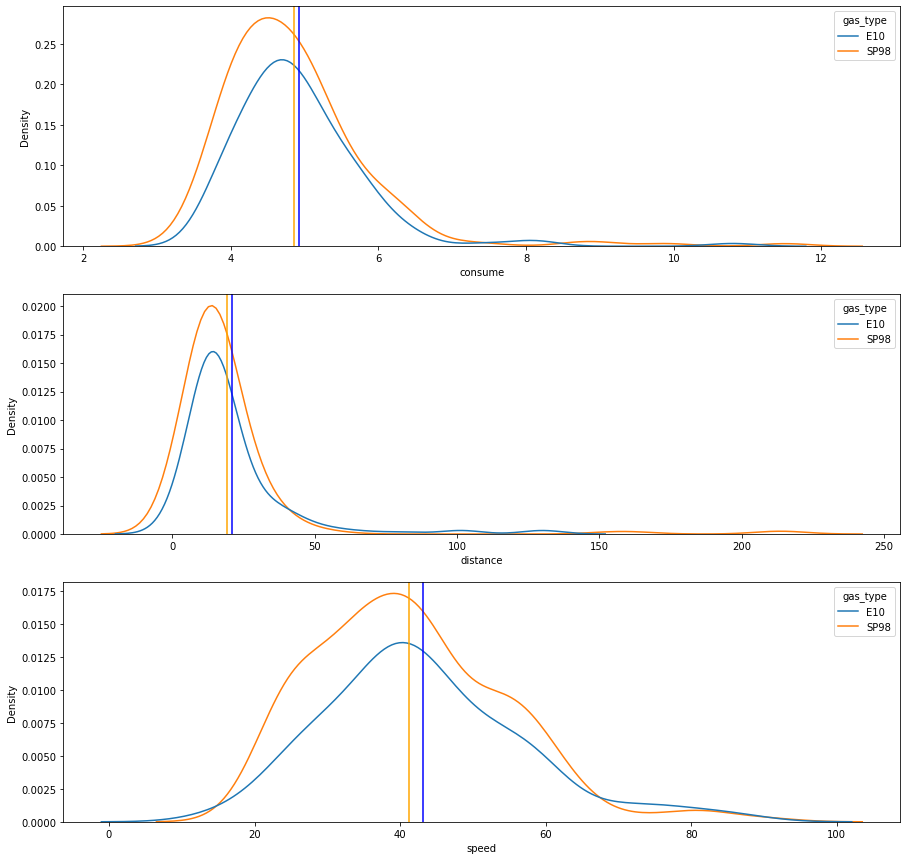

In [202]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

plot = sns.kdeplot(x=data.consume[(data.ac == 0)], hue=data.gas_type, ax=axs[0])
plot.axvline(x=E10[(E10.ac == 0)].consume.mean(), c="blue", label="mean E10")
plot.axvline(x=SP98[(SP98.ac == 0)].consume.mean(), c="orange", label="mean SP98")


plot1 = sns.kdeplot(x=data.distance[(data.ac == 0)], hue=data.gas_type, ax=axs[1])
plot1.axvline(x=E10[(E10.ac == 0)].distance.mean(), c="blue", label="mean E10")
plot1.axvline(x=SP98[(SP98.ac == 0)].distance.mean(), c="orange", label="mean SP98")

plot2 = sns.kdeplot(x=data.speed[(data.ac == 0)], hue=data.gas_type, ax=axs[2])
plot2.axvline(x=E10[(E10.ac == 0)].speed.mean(), c="blue", label="mean E10")
plot2.axvline(x=SP98[(SP98.ac == 0)].speed.mean(), c="orange", label="mean SP98")
